In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
adata_atac= sc.read_h5ad('/data2st1/junyi/output/atac0627/3REGIONS_gene.h5ad')

In [3]:
adata_sc = sc.read_h5ad("/data1st1/sch/20250626/anndata_before_intergration_anno.h5ad")

In [40]:
# downsample the sc data t0 5000 cells 
adata_scsubset = sc.pp.subsample(adata_sc[adata_sc.obs.region.isin(['HPF','AMY','PFC']) & (adata_sc.obs.sex=='M')], n_obs=5000, copy=True)

In [5]:
adata_atacsubset = sc.pp.subsample(adata_atac, n_obs=5000, copy=True)

In [41]:
adata_scsubset

AnnData object with n_obs × n_vars = 5000 × 32285
    obs: 'batch', 'region', 'tech', 'donor', 'sex', 'status', 'folder', 'path', 'capture_rate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'doublet_score', 'predicted_doublet', 'outlier', 'leiden', 'predicted_labels', 'conf_score', 'pred_mwb', 'pred_mdg', 'pred_mih', 'pred_mpd', 'level1', 'level2', 'group', 'filter1', 'trd', 'treatment', 'louvain', 'Neurotransmitter_celltype', 'celltype.L1', 'celltype.L2', 'predict.subclass', 'umap_seurat_1', 'umap_seurat_2'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'celltype.L2_colors', 'donor_colors', 'gender_colors', 'hvg', 'leiden', 'level1_colors', 'level2_colors', 'log1p', 'neighbors', 'pca', 'pred_mdg_colors', 'pred_mih_

In [7]:
df_marker_list = pd.read_csv('/data2st1/junyi/data/markerlist.csv')

In [8]:
df_marker_list

,cell type,BrainRegion,Marker1,Marker2,Neurotransmitter
0,AMY Ccdc3_Acvr1c Glut,AMY,Ccdc3,Acvr1c,Glut
1,AMY Cdh23_Hmcn1 Glut,AMY,Cdh23,Hmcn1,Glut
2,AMY Foxp2_Penk GABA,AMY,Foxp2,Penk,GABA
3,AMY Hgf_Satb2 Glut,AMY,Hgf,Satb2,Glut
4,AMY Igfn1_Scube1 Glut,AMY,Igfn1,Scube1,Glut
...,...,...,...,...,...
216,Tanycyte,NN,Rax,Gpr50,NN
217,VLMC-1,NN,"Lum,Dcn",Sidt1,NN
218,VLMC-2,NN,"Lum,Dcn",Ppp1r1a,NN
219,VLMC-3,NN,"Lum,Dcn",Enpp1,NN


In [9]:
dict_maker = {}
for index,row in df_marker_list.iterrows():
    celltype = row['cell type']
    marker = row['Marker1']
    marker_list = []
    if type(marker) == str:
        maker1 = marker.split(',')
        marker_list.extend(maker1)
    marker2 = row['Marker2']
    if type(marker2) == str:
        maker2 = marker2.split(',')
        marker_list.extend(maker2)
    dict_maker[celltype] = marker_list
all_markers = []
for key in dict_maker.keys():
    
    all_markers.extend(dict_maker[key])

In [10]:
# cal intersection between adata_sc.var
intersect_markers = adata_sc.var_names.intersection(all_markers)

In [11]:
marker_genes_dict = {
    "Neuron": ["Snap25", "Syt1", "Gad1", "Slc17a7"],
    "Astrocyte-Epen": ["Gfap", "Aqp4", "Slc1a3", "Aldh1l1"],
    "OPC-Oligo": ["Mag", "Mog", "Pdgfra", "Plp1"],
    "Vascular": ["Flt1", "Kcnj8", "Dcn"],
    "Immune": ["Cx3cr1", "Dock8"]
}


In [45]:
colors={'gender': {'M': '#0080FF', 'F': '#E800E8'},
 'region': {'AMY': '#1f77b4',
  'Isocortex': '#ff7f0e',
  'HPF': '#009E73',
  'HY': '#d62728',
  'MB': '#9467bd',
  'PFC': '#8c564b',
  'STR': '#e377c2',
  'TH': '#bcbd22',
  'Astro_Epen': '#17becf',
  'OPC_Oligo': '#7f7f7f',
  'Astro-Epen': '#17becf',
  'OPC-Oligo': '#7f7f7f',
  'Immune': '#ff9896',
  'Vascular': '#c5b0d5'},
 'neurotransmitter': {'Chol': '#1f77b4',
  'Dopa': '#ff7f0e',
  'Gaba': '#279e68',
  'Glut': '#d62728',
  'Hist': '#aa40fc',
  'NN': '#8c564b',
  'Sero': '#e377c2'},
 'degs': {'UP': '#d62728', 'DOWN': '#3498db'}}

/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:2406: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


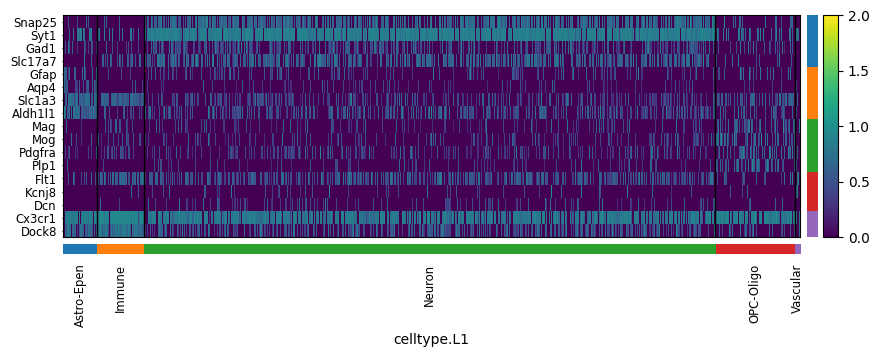

In [48]:
# order of cell types
sc.pl.heatmap(adata_atacsubset, marker_genes_dict, groupby='celltype.L1', swap_axes=True,log=True,dendrogram=False, vmin=0, vmax=2, 
              standard_scale='var', show_gene_labels=True)


/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:2406: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


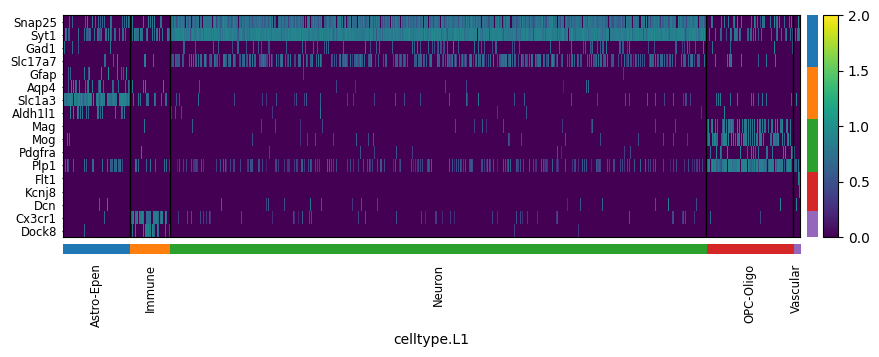

In [42]:
sc.pl.heatmap(adata_scsubset, marker_genes_dict, groupby='celltype.L1', swap_axes=True,log=True,dendrogram=False, vmin=0, vmax=2, standard_scale='var', show_gene_labels=True)
